In [36]:
import sys
sys.path.insert(0, "/cndd/fangming/CEMBA/snmcseq_dev")
from multiprocessing import Pool,cpu_count
from functools import partial
from scipy import sparse
from scipy import stats
import pickle
import datetime
import argparse
import logging

import snmcseq_utils
from __init__ import *
from __init__jupyterlab import *

import CEMBA_clst_utils
import fbpca

In [63]:
# output setting
name_tag = 'mop_10x_cells_v3_201123-v2'
output_res = '/cndd2/fangming/projects/miniatlas/results/clusterings_{}.tsv.gz'.format(name_tag) 
output_meta = '/cndd2/fangming/projects/miniatlas/results/clusterings_meta_{}.tsv.gz'.format(name_tag) 

# config
start, end = 2, 4
resolutions = np.logspace(start, end, 10*(end-start)+1)[1:]
print(resolutions)
npc = 50
kforleiden = 30

[  125.89254118   158.48931925   199.5262315    251.18864315
   316.22776602   398.10717055   501.18723363   630.95734448
   794.32823472  1000.          1258.92541179  1584.89319246
  1995.26231497  2511.88643151  3162.27766017  3981.07170553
  5011.87233627  6309.5734448   7943.28234724 10000.        ]


In [38]:
# read in data
mod = '10x_cells_v3'
f_cell = '/cndd/fangming/CEMBA/data/MOp_all/data_freeze_neurons/{}_hvfeatures.cell'.format(mod)
f_gene = '/cndd/fangming/CEMBA/data/MOp_all/data_freeze_neurons/{}_hvfeatures.gene'.format(mod)
f_mat = '/cndd/fangming/CEMBA/data/MOp_all/data_freeze_neurons/{}_hvfeatures.npz'.format(mod)
gc_mat = snmcseq_utils.load_gc_matrix(f_gene, f_cell, f_mat)
print(gc_mat.data.shape, len(gc_mat.gene), len(gc_mat.cell))

(4694, 69727) 4694 69727


In [40]:
# Louvain clustering for different resolutions

# X should be selected from highly variable genes and normalized
U, s, Vt = fbpca.pca(gc_mat.data.T.todense(), k=npc)
pcX = U.dot(np.diag(s))

res_clsts = CEMBA_clst_utils.clustering_routine_multiple_resolutions(
                    pcX, gc_mat.cell, kforleiden, 
                    seed=1, verbose=True,
                    resolutions=resolutions, metric='euclidean', option='plain', 
                    n_trees=10, search_k=-1, num_starts=None
                    )
print(res_clsts.shape)
res_clsts.head()

Time used to build kNN map 2.0188581943511963
Time used to get kNN 8.422993183135986
Time spent on leiden clustering: 4.202243328094482
Time spent on leiden clustering: 3.918863534927368
Time spent on leiden clustering: 4.083383083343506
Time spent on leiden clustering: 4.143889427185059
Time spent on leiden clustering: 4.370751619338989
Time spent on leiden clustering: 4.485912084579468
Time spent on leiden clustering: 4.82826828956604
Time spent on leiden clustering: 5.22919487953186
Time spent on leiden clustering: 5.767412900924683
Time spent on leiden clustering: 6.505194902420044
Time spent on leiden clustering: 6.918251037597656
Time spent on leiden clustering: 7.3786211013793945
Time spent on leiden clustering: 8.498175621032715
Time spent on leiden clustering: 9.41331934928894
Time spent on leiden clustering: 10.360352993011475
Time spent on leiden clustering: 10.78068995475769
Time spent on leiden clustering: 9.90769100189209
Time spent on leiden clustering: 8.696901798248291

,cluster_r125.89254117941675,cluster_r158.48931924611142,cluster_r199.52623149688787,cluster_r251.18864315095797,cluster_r316.22776601683796,cluster_r398.1071705534973,cluster_r501.18723362727246,cluster_r630.957344480193,cluster_r794.3282347242813,cluster_r1000.0,cluster_r1258.9254117941675,cluster_r1584.893192461114,cluster_r1995.2623149688789,cluster_r2511.886431509582,cluster_r3162.2776601683795,cluster_r3981.0717055349733,cluster_r5011.872336272725,cluster_r6309.57344480193,cluster_r7943.282347242822,cluster_r10000.0
sample,,,,,,,,,,,,,,,,,,,,
10x_cells_v3_AAACCCAAGCTTCATG-1L8TX_181211_01_G12,558,704,632,579,2116,2161,1923,2804,6730,2493,3510,6736,3251,1522,2846,1304,2315,3699,1946,910
10x_cells_v3_AAACCCACACCAGCCA-1L8TX_181211_01_G12,659,523,324,429,494,70,366,208,245,1238,150,529,283,183,345,11005,5731,3700,1947,911
10x_cells_v3_AAACGAACAACGATTC-1L8TX_181211_01_G12,1024,998,1164,1594,677,3388,4143,5276,5265,7917,3028,5933,4329,2054,2364,3403,2341,1318,1948,912
10x_cells_v3_AAACGAATCTCGTGAA-1L8TX_181211_01_G12,428,919,736,1484,2481,1064,4520,5336,2006,1790,8062,6563,7149,9623,6307,9121,5733,3701,1949,913
10x_cells_v3_AAACGCTGTAGTCACT-1L8TX_181211_01_G12,7,85,266,86,49,688,388,1307,903,1428,6338,6576,16477,14862,12266,9122,5734,3702,1950,914


In [41]:
# get number of uniq clusters for each clustering
metadata = []
for col in res_clsts:
    num_clsts = len(res_clsts[col].unique())
    metadata.append({
        'name': col,
        'num_clsts': num_clsts,
    })
metadata = pd.DataFrame(metadata)

print(metadata.shape)
metadata.head()

(20, 2)


,name,num_clsts
0,cluster_r125.89254117941675,1180
1,cluster_r158.48931924611142,1485
2,cluster_r199.52623149688787,1884
3,cluster_r251.18864315095797,2365
4,cluster_r316.22776601683796,3038


68741


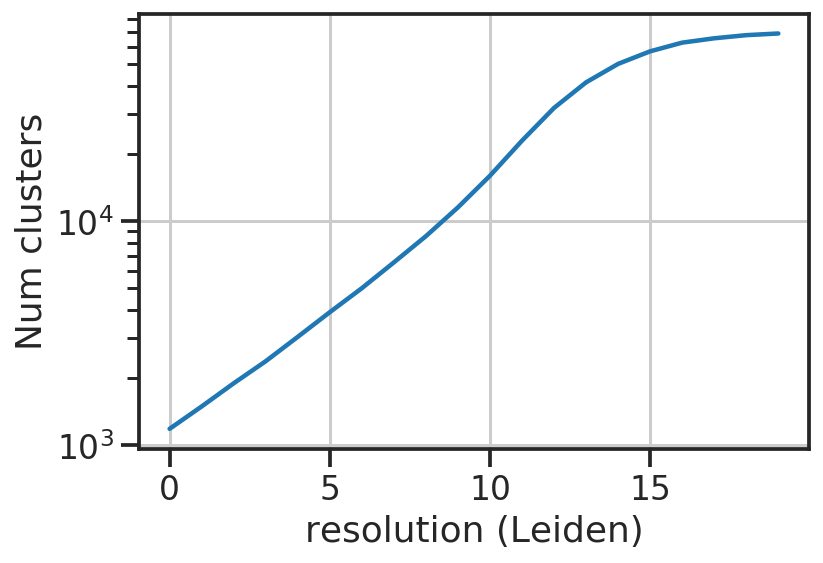

In [55]:
fig, ax = plt.subplots()
ax.plot(metadata['num_clsts'].values)
ax.set(**{'ylabel': 'Num clusters', 
          'xlabel': 'resolution (Leiden)', 
         })
# ax.set_ylim(ymin=1)
ax.set_yscale('log')

print(metadata['num_clsts'].max())
plt.show()

In [56]:
# group clusters with the same # of clusters

metadata_new = metadata.reset_index().groupby('num_clsts').first().copy().drop('index', axis=1)
metadata_new['name_new'] = ['cluster_n{}'.format(n) for n in metadata_new.index]

rename_dict = metadata_new[['name', 'name_new']].set_index('name')['name_new'].to_dict()
res_clsts_new = res_clsts[metadata_new['name']].rename(columns=rename_dict).copy()

In [64]:
metadata_new = metadata_new.loc[((metadata_new.index.values>6000) & (metadata_new.index.values<20000))]
res_clsts_new = res_clsts_new[metadata_new['name_new']]
print(metadata_new.shape, res_clsts_new.shape)
metadata_new.head()

(4, 2) (69727, 4)


,name,name_new
num_clsts,,
6531,cluster_r630.957344480193,cluster_n6531
8553,cluster_r794.3282347242813,cluster_n8553
11500,cluster_r1000.0,cluster_n11500
15925,cluster_r1258.9254117941675,cluster_n15925


In [65]:
metadata_new.index.values #tail()

array([ 6531,  8553, 11500, 15925])

In [66]:
# save results

res_clsts_new.to_csv(output_res, sep='\t', na_rep='NA', header=True, index=True)
metadata_new.to_csv(output_meta, sep='\t', na_rep='NA', header=True, index=True)

In [67]:
print(output_res)

/cndd2/fangming/projects/miniatlas/results/clusterings_mop_10x_cells_v3_201123-v2.tsv.gz
